#**Women_Cloth_Reviews_Prediction_With_Multinomial_Naive_bayes Model-**

# **Problem Statement/ Objective**

### **MNB is a probabilistic model that works well for text classification tasks, where the features are discrete and independent of each other given the class label.we have a Data set Containg the text information like customer Reviews- Our Goal is to Predict the Rating Based on the Reviews given by the Customers.**

#### **We are going to use Multinomial Naive Bayes (MNB) Algorithm which  is a variant of the Naive Bayes algorithm used for classification tasks in machine learning. It is particularly suited to text classification problems, such as sentiment analysis, spam filtering, or topic classification**

##### **MNB assumes that each feature (or word) in the input data has a multinomial distribution, meaning that the frequency of a word in a document follows a multinomial distribution. It also assumes that the features (words) are independent of each other given the class label.**

# **Import Libraries**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [4]:
data = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [5]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
data.shape

(23486, 11)

# **Data PreProcessing**

In [9]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

##### **Let us fill the missing values in Review Text column with "NoReview"**

In [10]:
data[data['Review Text']==""]=np.NaN

In [11]:
data['Review Text'].fillna("NoReview",inplace = True)

In [12]:
data["Review Text"]

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

# **Some Data Visualizations**

<Axes: >

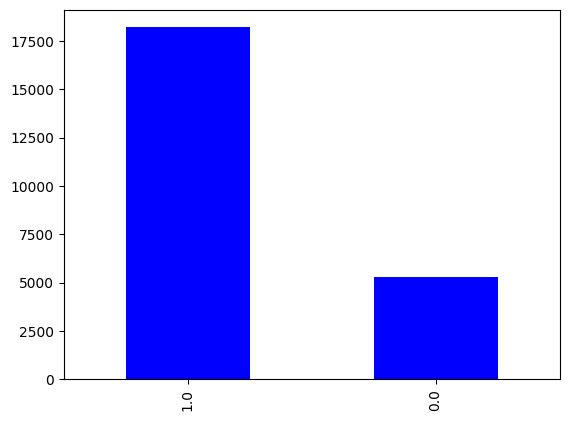

In [96]:
data["Rating"].value_counts().plot.bar(color = "blue")

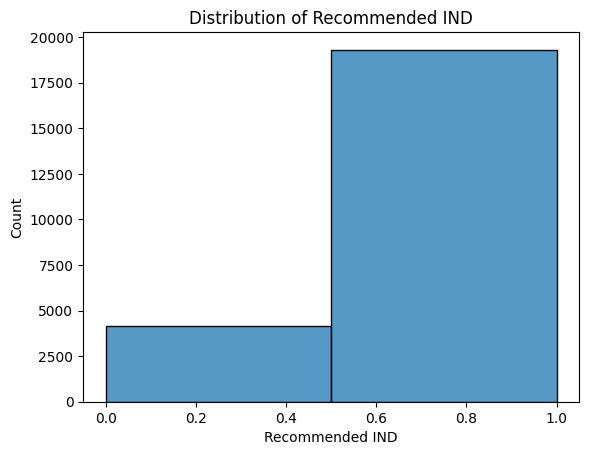

In [99]:
sns.histplot(data=data, x='Recommended IND', bins=2)
plt.xlabel('Recommended IND')
plt.ylabel('Count')
plt.title('Distribution of Recommended IND')
plt.show()


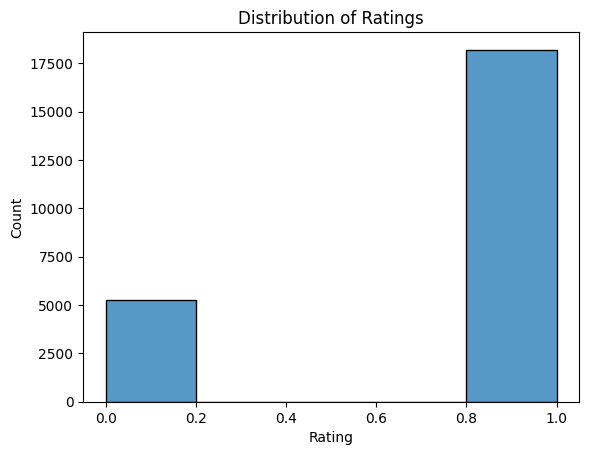

In [100]:
sns.histplot(data=data, x='Rating', bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


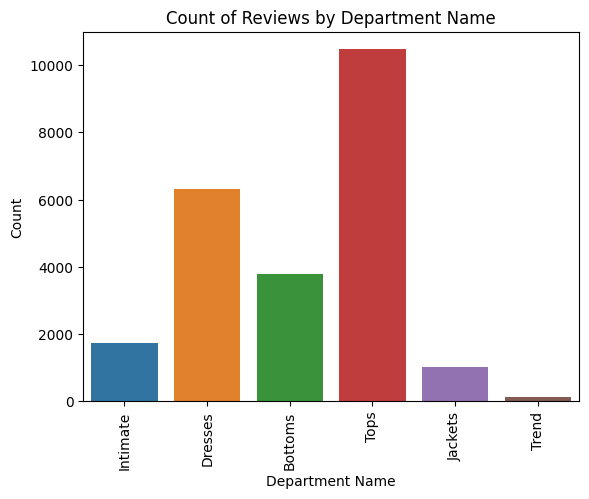

In [101]:
sns.countplot(data=data, x='Department Name')
plt.xticks(rotation=90)
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Count of Reviews by Department Name')
plt.show()


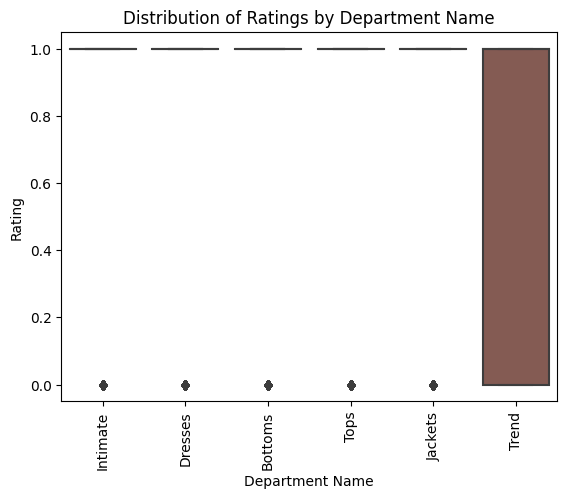

In [102]:
sns.boxplot(data=data, x='Department Name', y='Rating')
plt.xticks(rotation=90)
plt.xlabel('Department Name')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Department Name')
plt.show()


<ipython-input-103-e44f6f1ffa4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


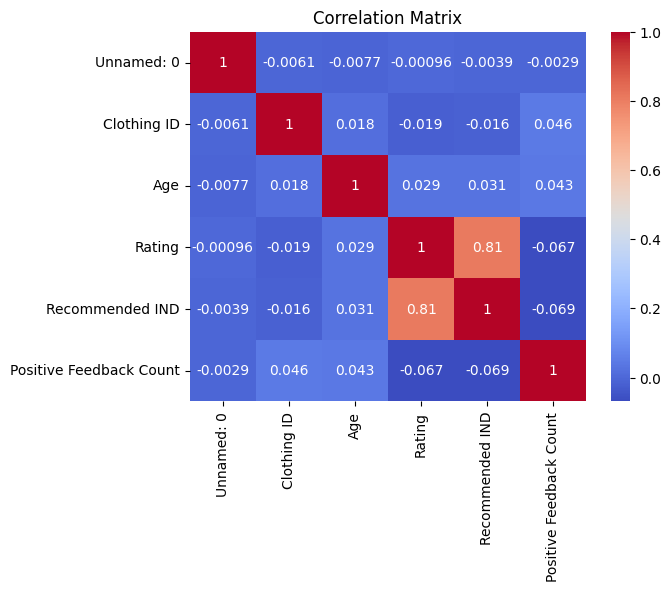

In [103]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Feature Selection- Define Target(y) & Feature(X)**

In [14]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [15]:
X = data["Review Text"]

In [16]:
y = data["Rating"]

# **Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,stratify = y,random_state = 2529)

# **Tokenisation**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(lowercase = True, analyzer = "word",stop_words = "english", ngram_range=(2,3), max_features= 5000)

In [21]:
X_train = cv.fit_transform(X_train)

In [22]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [23]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X_test = cv.fit_transform(X_test)

In [25]:
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [26]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Model Building**

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
MNB_model = MultinomialNB()

In [29]:
MNB_model.fit(X_train,y_train)

MultinomialNB()

# **Model Predictions**

In [30]:
y_pred = MNB_model.predict(X_test)

In [31]:
y_pred.shape

(7046,)

In [32]:
y_pred

array([1., 5., 5., ..., 5., 5., 5.])

# **Probablity Of Each Predicted Class**

In [33]:
MNB_model.predict_proba(X_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

# **Model Evaluation**

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
cr = classification_report(y_pred,y_test)

In [36]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.06      0.02      0.03       711
         2.0       0.09      0.08      0.09       514
         3.0       0.13      0.14      0.14       787
         4.0       0.22      0.25      0.23      1345
         5.0       0.56      0.60      0.58      3689

    accuracy                           0.39      7046
   macro avg       0.21      0.22      0.21      7046
weighted avg       0.37      0.39      0.37      7046



In [37]:
cm = confusion_matrix(y_pred,y_test)

In [38]:
print(cm)

[[  15   43  116  166  371]
 [  13   43   78  108  272]
 [  45   86  113  194  349]
 [  36   85  166  336  722]
 [ 144  213  388  719 2225]]


# **Recategorizing Rating- As poor(0) and good(1)**

In [39]:
data.replace({'Rating': {0:1,1:0,2:0,3:0,4:1,5:1}},inplace= True)

In [40]:
y = data['Rating']

In [41]:
X = data["Review Text"]

# **Train Test Split**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,stratify = y,random_state = 2529)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((16440,), (7046,), (16440,), (7046,))

# **Tokeniszation of Feature Text**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(lowercase = True, analyzer = "word",stop_words = "english", ngram_range=(2,3), max_features= 5000)

In [47]:
X_train = cv.fit_transform(X_train)

In [48]:
X_test = cv.fit_transform(X_test)

# **Model Re-training**

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
model = MultinomialNB()

In [51]:
model.fit(X_train,y_train)

MultinomialNB()

# **Model Predictions**

In [52]:
y_pred2 = model.predict(X_test)

In [53]:
y_pred2

array([1., 1., 1., ..., 1., 1., 1.])

# **Model Evaluation**

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [63]:
cm = confusion_matrix(y_pred2,y_test)

In [64]:
print(cm)

[[ 449  989]
 [1134 4474]]


In [65]:
cr = classification_report(y_pred2,y_test)

In [66]:
print(cr)

              precision    recall  f1-score   support

         0.0       0.28      0.31      0.30      1438
         1.0       0.82      0.80      0.81      5608

    accuracy                           0.70      7046
   macro avg       0.55      0.56      0.55      7046
weighted avg       0.71      0.70      0.70      7046



In [67]:
print(accuracy_score(y_pred2,y_test)*100)

69.8694294635254


### **My model has Got 70 percent Accuracy**

# **Model Testing and Conclusion**

In [91]:
test = X_test[34]

In [92]:
result = model.predict(test)

In [93]:
if result == 1:
  print("It has Good Rating")
else:
  print("It has poor Rating")

It has Good Rating


# **My model is successfully able to predict the Rating based on a review given by customer on the product purchased**